In [12]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import gmaps
import os

from api_keys import g_key

base_url="https://api.rawg.io/api/"

In [2]:
# API call for all games released between 2015-2019

game_name=[]
game_id=[]
game_rating=[]
game_rating_top=[]
game_rating_count=[]
game_metacritic=[]

count=1
while count:
    url=base_url+"games?dates=2015-01-01,2019-12-31&page="+str(count)
    response=requests.get(url)
    if response.status_code!=200:
        break
    else:
        games=response.json()
        print(f'getting data from {url}')
        for i in range(len(games["results"])):
            try:
                if (len(games["results"][i]["platforms"])>0) & \
                (len(games["results"][i]["stores"])>0) & \
                (len(games["results"][i]["genres"])>0) & \
                (games["results"][i]["rating"]>0) & \
                (games["results"][i]["metacritic"]>0):
                    # game name
                    game_name.append(games["results"][i]["name"])
                    #game id
                    game_id.append(games["results"][i]["id"])
                    # game rating
                    game_rating.append(games["results"][i]["rating"])
                    game_rating_top.append(games["results"][i]["rating_top"])
                    game_rating_count.append(games["results"][i]["ratings_count"])
                    game_metacritic.append(games["results"][i]["metacritic"])
                    # added-by status
                    added_count.append(games["results"][i]["added_by_status"])
            except:
                continue
        count += 1

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=1
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=2
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=3
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=4
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=5
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=6
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=7
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=8
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=9
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=10
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=11
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=12
g

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=99
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=100
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=101
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=102
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=103
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=104
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=105
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=106
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=107
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=108
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=109
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=196
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=197
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=198
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=199
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=200
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=201
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=202
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=203
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=204
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=205
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=206
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=293
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=294
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=295
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=296
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=297
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=298
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=299
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=300
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=301
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=302
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=303
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=390
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=391
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=392
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=393
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=394
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=395
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=396
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=397
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=398
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=399
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=400
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=487
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=488
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=489
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=490
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=491
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=492
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=493
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=494
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=495
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=496
getting data from https://api.rawg.io/api/games?dates=2015-01-01,2019-12-31&page=497
getting data from https://api.rawg.io/api/games?dates=2015-01-01,

In [3]:
developers=[]

for i in game_id:
    url=base_url+"games/"+str(i)
    try:
        response=requests.get(url).json()
        print(f'getting developer from {url}')
        curr_dev=[]
        for j in range(len(response["developers"])):
            curr_dev.append(response["developers"][j]["name"])
        developers.append(curr_dev)
    except:
        developers.append("missing")

getting developer from https://api.rawg.io/api/games/3328
getting developer from https://api.rawg.io/api/games/3439
getting developer from https://api.rawg.io/api/games/28
getting developer from https://api.rawg.io/api/games/2454
getting developer from https://api.rawg.io/api/games/3070
getting developer from https://api.rawg.io/api/games/58175
getting developer from https://api.rawg.io/api/games/3272
getting developer from https://api.rawg.io/api/games/3192
getting developer from https://api.rawg.io/api/games/32
getting developer from https://api.rawg.io/api/games/278
getting developer from https://api.rawg.io/api/games/10035
getting developer from https://api.rawg.io/api/games/7689
getting developer from https://api.rawg.io/api/games/3287
getting developer from https://api.rawg.io/api/games/2462
getting developer from https://api.rawg.io/api/games/1447
getting developer from https://api.rawg.io/api/games/58134
getting developer from https://api.rawg.io/api/games/2551
getting develope

getting developer from https://api.rawg.io/api/games/715
getting developer from https://api.rawg.io/api/games/137
getting developer from https://api.rawg.io/api/games/382
getting developer from https://api.rawg.io/api/games/10040
getting developer from https://api.rawg.io/api/games/2574
getting developer from https://api.rawg.io/api/games/45821
getting developer from https://api.rawg.io/api/games/50778
getting developer from https://api.rawg.io/api/games/12884
getting developer from https://api.rawg.io/api/games/44525
getting developer from https://api.rawg.io/api/games/9979
getting developer from https://api.rawg.io/api/games/2845
getting developer from https://api.rawg.io/api/games/28026
getting developer from https://api.rawg.io/api/games/11228
getting developer from https://api.rawg.io/api/games/9741
getting developer from https://api.rawg.io/api/games/1225
getting developer from https://api.rawg.io/api/games/10296
getting developer from https://api.rawg.io/api/games/99
getting dev

getting developer from https://api.rawg.io/api/games/3307
getting developer from https://api.rawg.io/api/games/9845
getting developer from https://api.rawg.io/api/games/57896
getting developer from https://api.rawg.io/api/games/311
getting developer from https://api.rawg.io/api/games/9644
getting developer from https://api.rawg.io/api/games/47
getting developer from https://api.rawg.io/api/games/10165
getting developer from https://api.rawg.io/api/games/13856
getting developer from https://api.rawg.io/api/games/486
getting developer from https://api.rawg.io/api/games/22508
getting developer from https://api.rawg.io/api/games/22344
getting developer from https://api.rawg.io/api/games/3416
getting developer from https://api.rawg.io/api/games/3187
getting developer from https://api.rawg.io/api/games/23702
getting developer from https://api.rawg.io/api/games/87
getting developer from https://api.rawg.io/api/games/58827
getting developer from https://api.rawg.io/api/games/52330
getting deve

getting developer from https://api.rawg.io/api/games/10364
getting developer from https://api.rawg.io/api/games/44931
getting developer from https://api.rawg.io/api/games/23458
getting developer from https://api.rawg.io/api/games/11839
getting developer from https://api.rawg.io/api/games/292842
getting developer from https://api.rawg.io/api/games/42912
getting developer from https://api.rawg.io/api/games/9603
getting developer from https://api.rawg.io/api/games/49563
getting developer from https://api.rawg.io/api/games/17417
getting developer from https://api.rawg.io/api/games/13156
getting developer from https://api.rawg.io/api/games/49428
getting developer from https://api.rawg.io/api/games/11514
getting developer from https://api.rawg.io/api/games/11159
getting developer from https://api.rawg.io/api/games/9668
getting developer from https://api.rawg.io/api/games/9962
getting developer from https://api.rawg.io/api/games/9963
getting developer from https://api.rawg.io/api/games/14211


getting developer from https://api.rawg.io/api/games/16867
getting developer from https://api.rawg.io/api/games/272448
getting developer from https://api.rawg.io/api/games/59602
getting developer from https://api.rawg.io/api/games/10004
getting developer from https://api.rawg.io/api/games/254542
getting developer from https://api.rawg.io/api/games/19272
getting developer from https://api.rawg.io/api/games/13008
getting developer from https://api.rawg.io/api/games/292843
getting developer from https://api.rawg.io/api/games/11184
getting developer from https://api.rawg.io/api/games/16381
getting developer from https://api.rawg.io/api/games/7784
getting developer from https://api.rawg.io/api/games/10029
getting developer from https://api.rawg.io/api/games/10081
getting developer from https://api.rawg.io/api/games/58312
getting developer from https://api.rawg.io/api/games/13657
getting developer from https://api.rawg.io/api/games/2713
getting developer from https://api.rawg.io/api/games/43

getting developer from https://api.rawg.io/api/games/272421
getting developer from https://api.rawg.io/api/games/12629
getting developer from https://api.rawg.io/api/games/10387
getting developer from https://api.rawg.io/api/games/61051
getting developer from https://api.rawg.io/api/games/19562
getting developer from https://api.rawg.io/api/games/2366
getting developer from https://api.rawg.io/api/games/29324
getting developer from https://api.rawg.io/api/games/10094
getting developer from https://api.rawg.io/api/games/49790
getting developer from https://api.rawg.io/api/games/12157
getting developer from https://api.rawg.io/api/games/23246
getting developer from https://api.rawg.io/api/games/9771
getting developer from https://api.rawg.io/api/games/2202
getting developer from https://api.rawg.io/api/games/22060
getting developer from https://api.rawg.io/api/games/14796
getting developer from https://api.rawg.io/api/games/14913
getting developer from https://api.rawg.io/api/games/3339


getting developer from https://api.rawg.io/api/games/15542
getting developer from https://api.rawg.io/api/games/58766
getting developer from https://api.rawg.io/api/games/14615
getting developer from https://api.rawg.io/api/games/3199
getting developer from https://api.rawg.io/api/games/11645
getting developer from https://api.rawg.io/api/games/15843
getting developer from https://api.rawg.io/api/games/10502
getting developer from https://api.rawg.io/api/games/16905
getting developer from https://api.rawg.io/api/games/17230
getting developer from https://api.rawg.io/api/games/45
getting developer from https://api.rawg.io/api/games/1269
getting developer from https://api.rawg.io/api/games/14491
getting developer from https://api.rawg.io/api/games/10408
getting developer from https://api.rawg.io/api/games/18555
getting developer from https://api.rawg.io/api/games/9730
getting developer from https://api.rawg.io/api/games/17627
getting developer from https://api.rawg.io/api/games/58816
get

getting developer from https://api.rawg.io/api/games/60618
getting developer from https://api.rawg.io/api/games/19313
getting developer from https://api.rawg.io/api/games/59894
getting developer from https://api.rawg.io/api/games/19113
getting developer from https://api.rawg.io/api/games/44425
getting developer from https://api.rawg.io/api/games/50000
getting developer from https://api.rawg.io/api/games/373511
getting developer from https://api.rawg.io/api/games/15848
getting developer from https://api.rawg.io/api/games/17856
getting developer from https://api.rawg.io/api/games/61148
getting developer from https://api.rawg.io/api/games/23759
getting developer from https://api.rawg.io/api/games/1009
getting developer from https://api.rawg.io/api/games/22022
getting developer from https://api.rawg.io/api/games/163
getting developer from https://api.rawg.io/api/games/11113
getting developer from https://api.rawg.io/api/games/16132
getting developer from https://api.rawg.io/api/games/51320

getting developer from https://api.rawg.io/api/games/646
getting developer from https://api.rawg.io/api/games/367194
getting developer from https://api.rawg.io/api/games/29204
getting developer from https://api.rawg.io/api/games/1277
getting developer from https://api.rawg.io/api/games/274847
getting developer from https://api.rawg.io/api/games/10505
getting developer from https://api.rawg.io/api/games/14321
getting developer from https://api.rawg.io/api/games/2810
getting developer from https://api.rawg.io/api/games/61105
getting developer from https://api.rawg.io/api/games/2084
getting developer from https://api.rawg.io/api/games/60004
getting developer from https://api.rawg.io/api/games/62351
getting developer from https://api.rawg.io/api/games/261247
getting developer from https://api.rawg.io/api/games/48930
getting developer from https://api.rawg.io/api/games/1085
getting developer from https://api.rawg.io/api/games/2855
getting developer from https://api.rawg.io/api/games/3009
ge

In [4]:
num_developers=[]

for i in developers:
    num_developers.append(len(i))
    if len(i) >4:
        print(i)

['Blue Byte', 'Ubisoft', 'Ubisoft Montreal', 'Ubisoft Quebec', 'Ubisoft Toronto']
['Beenox', 'Raven Software', 'Treyarch', 'Mercenary Technology', 'Aspyr Media']
['Ubisoft', 'Ubisoft Kiev', 'Ubisoft Montreal', 'Ubisoft Toronto', 'Red Storm', 'Ubisoft Shanghai']
['Ubisoft', 'Ubisoft Bucharest', 'Ubisoft Kiev', 'Ubisoft Montpellier', 'Ubisoft Montreal', 'Ubisoft Quebec', 'Ubisoft Shanghai', 'Ubisoft Singapore']
['Efecto Studios', 'Instinct Games', 'Studio Wildcard', 'Virtual Basement LLC', 'WILDCARD PROPERTIES']
['Reflections', 'Ubisoft', 'Ubisoft Annecy', 'Ubisoft Bucharest', 'Ubisoft Milan', 'Ubisoft Montpellier', 'Ubisoft Paris']
['505 Games', 'Armature Studio', 'Inti Creates', 'Dico', 'ArtPlay']
['Devolver Digital', 'JW, Kitty, Jukio, and Dominik', 'JW, Kitty, Jukio, and Dom', 'and Dom', 'Jukio', 'JW', 'Kitty']
['Abstraction Games', 'Comcept', 'Engine Software', 'Inti Creates', '8-4']
['El Huervo / Niklas Åkerblad', 'Erik Svedäng', 'Johannes Gotlén', 'Oscar "Ratvader" Rydelius', 'Tob

In [59]:
developer_df=pd.DataFrame(
    {
        "game":game_name,
        "developer":developers,
        "number of devs":num_developers,
        "rating":game_rating,
        "rating count":game_rating_count,
        "metacritic":game_metacritic
    }
)

developer_df=developer_df[developer_df["number of devs"]>0]
developer_df=developer_df[developer_df["developer"]!="missing"]
developer_df["number of devs"].value_counts()

1    576
2    416
3    132
4     38
5     10
7      2
6      2
8      1
Name: number of devs, dtype: int64

In [60]:
for i in developer_df.index:
    developer_df.loc[i,"first dev"]=developer_df.loc[i,"developer"][0]

In [61]:
developer_df.to_csv("csvfiles/developers.csv")
developer_df.head()

,game,developer,number of devs,rating,rating count,metacritic,first dev
0,The Witcher 3: Wild Hunt,[CD PROJEKT RED],1,4.67,3475,93,CD PROJEKT RED
1,Life is Strange,[DONTNOD Entertainment],1,4.10,2219,83,DONTNOD Entertainment
2,Red Dead Redemption 2,[Rockstar Games],1,4.56,2542,96,Rockstar Games
3,DOOM (2016),"[Bethesda Softworks, id Software]",2,4.40,2174,85,Bethesda Softworks
4,Fallout 4,[Bethesda Game Studios],1,3.75,1988,84,Bethesda Game Studios


In [70]:
dev_gamecount=pd.DataFrame(developer_df.groupby("first dev")["rating"].count())
dev_gamecount=dev_gamecount.sort_values("rating",ascending=False)
dev_gamecount=dev_gamecount[dev_gamecount["rating"]>5]
dev_gamecount

,rating
first dev,
BANDAI NAMCO Entertainment America Inc.,21
Devolver Digital,16
Nintendo,15
Electronic Arts,14
Ubisoft,14
Daedalic Entertainment,12
Capcom,12
Square Enix,11


(array([576., 416., 132.,   0.,  38.,  10.,   0.,   2.,   2.,   1.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

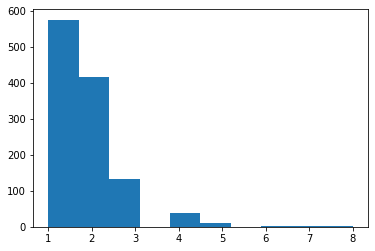

In [10]:
plt.hist(developer_df["number of devs"])

In [ ]:
params={
    "inputtype":"textquery",
    "key":g_key,
}

for i in developer_df["developer"]:
    for j in i:
        params["input"]=i
        url="https://maps.googleapis.com/maps/api/place/autocomplete/json?parameters"
        response=requests.get(base_url, params=params).json()
        try:
        hotel_df.loc[index,"Hotel Name"]=response["results"][0]["name"]
        hotel_df.loc[index,"City"]=row["City"]
        hotel_df.loc[index,"Country"]=row["Country"]
        hotel_df.loc[index,"Lat"]=response["results"][0]["geometry"]["location"]["lat"]
        hotel_df.loc[index,"Lng"]=response["results"][0]["geometry"]["location"]["lng"]
    except (KeyError,IndexError):
        continue
hotel_df

In [50]:
params={
    "inputtype":"textquery",
    "key":g_key,
    "input":"CD PROJEKT RED"
}

url="https://maps.googleapis.com/maps/api/place/autocomplete/json?parameters"
response=requests.get(url, params=params).json()

In [51]:
print(json.dumps(response,indent=4))

{
    "predictions": [
        {
            "description": "CD Projekt Red, aleja 3 Maja, Krak\u00f3w, Poland",
            "id": "7da83d779b5fbc42c744099a59cd05daf89efa80",
            "matched_substrings": [
                {
                    "length": 14,
                    "offset": 0
                }
            ],
            "place_id": "ChIJOb0xDqBbFkcRAe8KozQOjNE",
            "reference": "ChIJOb0xDqBbFkcRAe8KozQOjNE",
            "structured_formatting": {
                "main_text": "CD Projekt Red",
                "main_text_matched_substrings": [
                    {
                        "length": 14,
                        "offset": 0
                    }
                ],
                "secondary_text": "aleja 3 Maja, Krak\u00f3w, Poland"
            },
            "terms": [
                {
                    "offset": 0,
                    "value": "CD Projekt Red"
                },
                {
                    "offset": 16,
            